### Grupo B04
### Miguel Egido Morales, Alfredo Robledano Abasolo, Ana Robledano Abasolo


# P1 AA Configuración y Entrenamiento de una Red de Neuronas

Utilizaremos la **biblioteca Python Keras** para **clasificar** artículos de ropa.

**PROBLEMA:**
- Clasificación de imágenes en escala de grises de prendas de ropa (28 x 28 píxeles) en sus 10 categorías (de 0 a 9, guardadas en etiquetas).
- Usaremos 60K imágenes de entrenamiento y más de 10K imágenes de prueba
- El conjunto de datos MNIST está precargado en Keras en la forma de un conjunto de cuatro matrices Numpy
- Algunas muestras
- Tenemos las siguientes categorías o **clases** del problema de clasificación de ropa: T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot.
- Los "puntos de datos" son **muestras**
- La clase asociado a una muestra específica se llama **etiqueta**

Importamos el paquete tensorflow que contiene a la librería keras

In [87]:
import tensorflow as tf
tf.__version__ >= '2.0.0'  # Comprobamos que estamos usando al menos la versión 2.0.0

True

El módulo keras.datasets contiene un dataset con imágenes de ropa que usaremos para este proyecto.\
Las imágenes se encuentran convenientemente etiquetadas y en formato mnist.\
A continuación almacenamos en memoria las imágenes de entrenamiento  e imágenes de test (junto con sus etiquetas).

In [88]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(type(train_images), train_images.shape, train_labels.shape)
print(type(test_images), test_images.shape, test_labels.shape)

<class 'numpy.ndarray'> (60000, 28, 28) (60000,)
<class 'numpy.ndarray'> (10000, 28, 28) (10000,)


Observamos que train_images y test_images son numpy.arrays de 3 dimensiones.\
60_000 imágenes de 28x28 pixels para el entrenamiento (60_000 etiquetas).\
10_000 imágenes de 28x28 pixels para test (10_000 etiquetas).

Comprobamos que las etiquetas van de 0 a 9

In [89]:
print(set(train_labels))
print(set(test_labels))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


Echemos un vistazo a alguna imagen del set de entrenamiento (son numpy arrays 2D)\
Por ejemplo la número 30_000\
Para ello importamos numpy, de forma que podamos cambiar las opciones de impresión

In [90]:
import numpy as np
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[30_000]))

[[  0   0   0   0   0   0   0   0   0   0 118 204 181 175 213 199 168 197 111   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 173 225 185 179 225 158 142 227 173   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 170 229 226 226 233 151 167 234 158   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 194 222 212 226 222 240 218 230 163   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 198 222 210 207 211 207 208 231 147   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 188 220 209 210 211 215 208 230 144   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 183 232 214 220 212 220 213 239 158   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 183 232 217 216 215 219 216 238 160   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 185 231 218 221 215 218 214 238 170   

A simple vista ningún problema\
Los valores de la matriz 2D asociada a la imagen están entre 0 y 255.\
Podemos ver su etiqueta asociada, 3.

In [91]:
print(train_labels[30_000])

3


Viendo la documentación sabemos que se trata de un vestido por ser el valor 3. (3: Dress)\
No obstante podemos usar el paquete matplotlib para ver como es la imagen

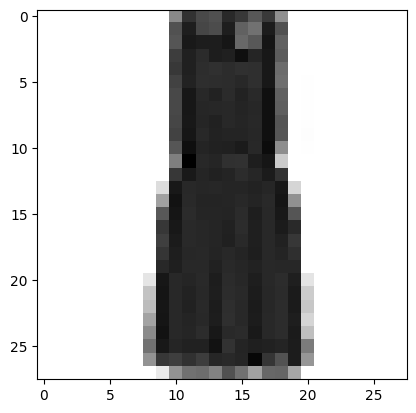

In [92]:
import matplotlib.pyplot as plt
ropa = train_images[30000]
plt.imshow(ropa, cmap=plt.cm.binary) # el num más bajo se pone en color blanco, y el más alto en negro
plt.show()

Abrimos también una imagen del set de test.

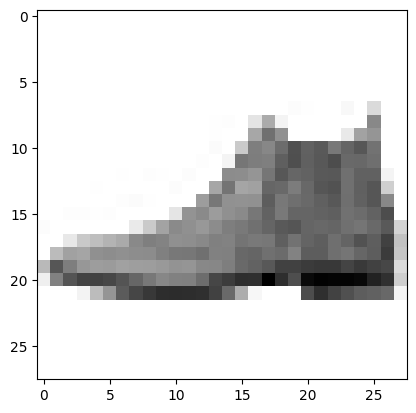

In [93]:
import matplotlib.pyplot as plt
ropa = test_images[0]
plt.imshow(ropa, cmap=plt.cm.binary) # Veamos el elemento 0 del set de tests y pintémoslo con matplotlib
plt.show()

Un zapato, no cabe duda

In [94]:
print(test_labels[0])

9


Así lo indica su etiqueta (9: shoe)


La función de keras keras.layers.Flatten() nos podría ser útil para aplanar la entrada .... (falta info)

## Cuestiones

# Normalización de los datos
para facilitar que converja el proceso de entrenamiento preparamos los datos de imagen con alguna transformación. Los tensores transformados tienen la misma cantidad de datos total que el tensor inicial.

Utilizaremos la función flatten

In [95]:
# train_images = train_images.reshape((60000, 28 * 28))  # TODO: eliminar esta linea
print(train_images.shape)
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[3000]))

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   1   1   0   0 120 131  91 147  30   0   0   1   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   3   0   0   0   0 251 199 172 195 152   0   0   0   0   3   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  43 124 193 166 239 255 216 172 228 126  61   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  96 167 155 159 171 178 211 215 210 196 189 158 164 159 108   0   0   0   0   0   0]
 [  0   0   0   0   0   0  83 157 131 117 120 148 148 145 178 159 174 160 123 132 142 172  38   0   0   0   0   0]
 [  0   0   0   0   0   0 159 128 118 120 122 112  93 124 161 109 128 128 129 146 138 167 122   0   0   0   0   0]
 [  0   0   0   0   0   0 171 135 120 114 118 119 107 125 123 117 124 124 119 145 147 166 148   0   0   0   0   0]
 [  0   0   0   0   0   4 171 138 126 120 117 118 102 122 145 111 120 122 120 152 154 155 170   0   0   0   0   0]
 [  0   0   0   0   0  31 170 129 138 125 113 106 103 118 137 10

In [96]:
train_images = train_images.astype('float32') / 255
print(np.matrix(train_images[3000]))

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.47 0.51 0.36 0.58 0.12 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.98 0.78 0.67 0.76 0.6  0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.17 0.49 0.76 0.65 0.94 1.   0.85 0.67 0.89 0.49 0.24 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.38 0.65 0.61 0.62 0.67 0.7  0.83 0.84 0.82 0.77 0.74 0.62 0.64 0.62 0.42 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.33 0.62 0.51 0.46 0.47 0.58 0.58 0.57 0.7  0.62 0.68 0.63 0.48 0.52 0.56 0.67 0.15 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.62 0.5  0.46 0.47 0.48 0.44 0.36 0.49 0.63 0.43 0.5  0.5  0.51 0.57 0.54 0.65 0.48 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.67 0.53 0.47 0.45 0.46 0.47 0.42 0.49 0.48 0.46 0.49 0.49 0.47 0.57 0.58 0.65 0.58 0.   0.   0.   0.   0.  ]

In [97]:
test_images = test_images.astype('float32') / 255

Codificaremos categoricamente las etiquetas en one-hot encoding, transformando las etiquetas en un vector de tantos ceros como el número de etiquetas distinta, y que contiene el valor de 1 en el índice que le corresponde al valor de la etiqueta:

In [98]:
# Preparación de las etiquetas
import numpy as np
from keras import utils
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels[30000] # Posición 0 a 9 donde solo la 3 tiene probabilidad 1.
# El número 30000 de entrenamiento es un 3

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

En el array de la etiqueta 30000, el 1 está en la posición 3 ya que se trata del índice 3 (Dress).

# 1. Configurar y entrenar los siguientes modelos de red de neuronas

A continuación establecemos los parámetros de configuración solicitados\
Utilizaremos namedtuples como contenedores de las configuraciones\
Nota: Las configuraciones de este tipo recomendaríamos tenerlas en un script aparte

In [99]:
from collections import namedtuple

# Guardamos las configuraciones en tuplas
neuronas_capa1 = (10, 10, 10, 10, 512, 512, 512, 512)
funcion_activacion = ("relu", "relu", "sigmoid", "sigmoid", "relu", "relu", "sigmoid", "sigmoid")
optimizador = ("sgd", "rmsprop", "sgd", "rmsprop", "sgd", "rmsprop", "sgd", "rmsprop")

# Usaremos namedtuples como contenedores de las configuraciones anteriores
param_rn = namedtuple("Param_RN",
                      ["neuronas_capa1","funcion_activacion","optimizador"])

# Guardamos en una lista las namedtuples
rn_configs = [param_rn(*params) for params in zip(neuronas_capa1,
                                                  funcion_activacion,
                                                  optimizador)]
print(rn_configs[0])  # Vemos un ejemplo de que el formato es correcto

Param_RN(neuronas_capa1=10, funcion_activacion='relu', optimizador='sgd')


Como queremos obtener los mismos resultados para cualquier usuario que ejecute el programa, usamos una seed para inicializar los pesos posteriormente.

In [100]:
# Establecer la semilla global
seed_value = 42
tf.random.set_seed(seed_value)

Adicionalmente se utilizará:
* función de perdida 'categorical_crossentropy'
* métrica de precisión
* 5 épocas

**CONSTRUIMOS LA RNA**
- **Capa** (**layers**) es el **componente básico de las redes neuronales**. => Es un **filtro** de datos (módulo de procesamiento de datos).Entran datos y salen con una forma más útil para el objetivo del problema a resolver. => **Destilación de datos**

El tipo de modelo para nuestras redes será secuencial y utilizaremos 2 capas densas (cada neurona está conectada a todas las demás de esa capa).
Las redes constarán de dos capas densas:
* **Capa 0** es una capa que convierte el input que son matrices 28x28 a un vector (aplana la matriz a un vector).
* **Capa 1** contiene el número de neuronas y su función de activación (ambos especificados en el enunciado)
* **Capa 2** contiene 10 neuronas (una para cada tipo de ropa) y función de activación softmax.
Esta última capa nos servirá para saber como de bien lo ha hecho la red, al devolvernos una matriz de 10 puntuaciones de probabilidad (sumando 1)

La puntuación será la probabilidad de que la imagen pertenezca a una de nuestras clases de 10 tipos de prendas.



In [101]:
# 3.- CONSTRUIMOS LA ARQUITECTURA DE LA RED
from keras import models  # importamos de keras las librerías de modelos y de capas (layers)
from keras import layers

img_shape = train_images.shape[1:]  # Dimensiones entradas (28, 28)
networks = []
weights_initializer = tf.keras.initializers.GlorotUniform(seed=seed_value) # inicialización de pesos usando GlorotUniform
for config in rn_configs:
  network = models.Sequential()
  # Capa 0 (Convertir el input en 1D)
  network.add(layers.Flatten(input_shape=img_shape,
                             name='Capa_0'))

  # Capa 1 (configuración enunciado)
  network.add(layers.Dense(units=config.neuronas_capa1,
                           activation=config.funcion_activacion,
                           kernel_initializer=weights_initializer, # inicialización de pesos
                           name='Capa_1'))

  # Capa 2 (10 neuronas y softmax)
  network.add(layers.Dense(units=10,
                           activation='softmax',
                           kernel_initializer=weights_initializer,
                           name='Capa_2'))
  networks.append(network)

# Por ejemplo, vemos la primera network de nuestra lista de networks
networks[0].summary()

Model: "sequential_97"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa_0 (Flatten)            (None, 784)               0         
                                                                 
 Capa_1 (Dense)              (None, 10)                7850      
                                                                 
 Capa_2 (Dense)              (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Hemos inicializado los pesos aleatoriamente usando Glorot uniform y la seed que hemos definido anteriormente.
Para conseguir una convergencia sustancialmente más rápida y una mayor precisión en los resultados, la mejor forma es inicializar los pesos con un inicializador de pesos GlorotNormal o GlorotUniform.

Observamos que para la primera red neuronal (networks[0]), tenemos un total de 7960 parámetros que se obtienen como resultado de *nº de neuronas x nº de entradas + sesgos* de cada capa ya que las capas son densas.

*   **Capa 1:** 10 x 784 + 10 = 7850
*   **Capa 2:** 10 x 10 + 10 = 110
*   **TOTAL:** 7850 + 110 = 7960

Para terminar de preparar la red, debemos elegir:
- Una **función de pérdida**: utilizaremos la función de pérdida `categorical_crossentropy` que mide la discrepancia entre las predicciones de un modelo y las respuestas reales en problemas de clasificación con múltiples categorías. Calcula la diferencia entre las distribuciones de probabilidad predichas y las verdaderas, utilizando la entropía cruzada como métrica.

- Un **optimizador**: dependiendo del caso usaremos los optimizadores `sgd` o `rmsprop`.
  

1.   SGD (Descenso de Gradiente Estocástico): Actualiza los pesos en dirección opuesta al gradiente de la función de pérdida. "Estocástico" significa que utiliza muestras de datos de manera aleatoria para calcular el gradiente, lo que puede ayudar a evitar mínimos locales.
2.   RMSprop (Root Mean Square Propagation): Modifica el SGD para adaptarse a tasas de aprendizaje diferentes para cada parámetro. Almacena una media móvil ponderada de los cuadrados de los gradientes anteriores y utiliza esta información para normalizar la tasa de aprendizaje.


- **Métricas** para monitorizar durante el entrenamiento y las pruebas. Solo nos preocuparemos por la **precisión** `accuracy` (la fracción de las imágenes que fueron clasificado).

In [102]:
# Cargamos el optimizador, la función de pérdida y las métricas
for i, config in enumerate(rn_configs):
  networks[i].compile(optimizer=config.optimizador,
                  loss='categorical_crossentropy',
                  metrics=['accuracy']) # si de cada 10 imágenes acierta 8, tiene un accuracy del 80%

La función de pérdida crossentropy se utiliza como señal
de retroalimentación para aprender los tensores de peso y que la fase de
entrenamiento intentará minimizar.\
La reducción de la pérdida se produce mediante el descenso de gradiente
estocástico minilote, cuyas reglas exactas están gobernadas por el optimizador
'rmsprop'.

# Entrenamiento de las redes neuronales


*   Nº de épocas: Usaremos 5 épocas (la red pasará 5 veces por el conjunto de datos) para
separar el entrenamiento en 5 fases, dividir el entrenamiento en épocas es útil para el registro y la evaluación periódica
*   Tamaño del lote (batch size): tomamos paquetes de 128 imágenes, para calcular la media de las pérdidas y ajustar los parámetros cada 128 imágenes.



Para evitar largo periodo de compilación, ejecutar esta celda para cargar directamente las redes previamente entrenadas y guardadas en el repositorio:

In [106]:
from keras.models import load_model

# Especifica la ruta al archivo del modelo
networks_path = 'trained_networks'

# Carga el modelo
network_loaded_0 = load_model("/".join([networks_path, "network_0"]))
print(modelo)

target = np.expand_dims(test_images[5], axis=0)  # Añadimos una dimensión al np.array
# TODO: prediccion de todas las redes
probability = network_loaded_0.predict(target)  # Obtenemos los resultados de la capa de salida (probabilidad en cada componente)
prediction = np.argmax(probability)  # Tomamos como salida de la red el índice de la categoría con mayor probabilidad

print(probability, prediction)

1/1 [==============================] - 0s 152ms/step
[[0.   0.97 0.   0.01 0.01 0.   0.01 0.   0.   0.  ]] 1


In [104]:
for i, network in enumerate(networks):
    network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5841 - accuracy: 0.7970
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5620 - accuracy: 0.8061
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5449 - accuracy: 0.8113
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.5313 - accuracy: 0.8164
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.5204 - accuracy: 0.8192
Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.4096 - accuracy: 0.8577
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4024 - accuracy: 0.8595
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3945 - accuracy: 0.8623
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3893 - accuracy: 0.8636
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3841 - accuracy: 0.8655
Epoch 1/5


La red empezará a iterar por lo datos de entrenamiento en minilotes de 128 muestras, 5 veces. En cada iteración, la red computará los gradientes de los pesos en relación con la pérdida en el lote y ajustará los pesos en
consecuencia. Tras estas 5 repeticiones, la red habrá realizado 2.345 ajustes de gradiente (469 por repetición), la pérdida será lo bastante baja como para que la red sea capaz de clasificar números escritos a mano con gran exactitud.

Ya que el tiempo de compilación es alto, hemos creado carpetas con las redes neuronales para no tener que compilarlas cada vez que se abra el documento. En su lugar, las cargaremos con la función load y trabajaremos con los resultados obtenidos.

# 2. Explicar la salida de la llamada model.summary() de cada uno de los 8 casos

In [ ]:
'''for i, network in enumerate(networks):
  print(f"\nPARÁMETROS DE LA RED NEURONAL {i}:")
  network.summary()
  print("\n")'''
networks[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 3. Analizar e interpretar los resultados del caso 2 y el 7 frente a sus originales si se multiplica por 5 las épocas de entrenamiento (25)

Imprimimos los resultados del caso 2 y 7 (con 5 épocas tal y como están programados originalmente).

In [ ]:
# 8.- VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
v = [1, 6]
for i in v:
  test_loss, test_acc = networks[i].evaluate(test_images, test_labels) # la precisión es menor, pq ha perdido generalidad (sobreentrenamiento)
  print('test_loss:', test_loss)
  print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 2.3668 - accuracy: 0.1172
test_loss: 2.3667678833007812
test_acc: 0.11720000207424164
313/313 [==============================] - 1s 3ms/step - loss: 2.5949 - accuracy: 0.1001
test_loss: 2.594871759414673
test_acc: 0.10010000318288803


Obtenemos una 'accuracy' del 79.51%

Multiplicamos por 5 las épocas de entrenamiento y volvemos a entrenar las redes 2 y 7 con el nuevo número de épocas.

In [ ]:
for i in v:
    networks[i].fit(train_images, train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 2s 3ms/step - loss: 0.8050 - accuracy: 0.7387
Epoch 2/25
469/469 [==============================] - 2s 3ms/step - loss: 0.5299 - accuracy: 0.8205
Epoch 3/25
469/469 [==============================] - 2s 3ms/step - loss: 0.4818 - accuracy: 0.8336
Epoch 4/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4562 - accuracy: 0.8431
Epoch 5/25
469/469 [==============================] - 3s 6ms/step - loss: 0.4374 - accuracy: 0.8491
Epoch 6/25
469/469 [==============================] - 3s 6ms/step - loss: 0.4260 - accuracy: 0.8529
Epoch 7/25
469/469 [==============================] - 3s 6ms/step - loss: 0.4159 - accuracy: 0.8562
Epoch 8/25
469/469 [==============================] - 3s 6ms/step - loss: 0.4090 - accuracy: 0.8591
Epoch 9/25
469/469 [==============================] - 3s 6ms/step - loss: 0.4023 - accuracy: 0.8607
Epoch 10/25
469/469 [==============================] - 3s 6ms/step - loss: 0.3963 - accuracy: 0.8616

KeyboardInterrupt: 

Imprimimos los nuevos resultados de los casos 2 y 3

In [ ]:
for i in v:
  test_loss, test_acc = networks[i].evaluate(test_images, test_labels) # la precisión es menor, pq ha perdido generalidad (sobreentrenamiento)
  print('test_loss:', test_loss)
  print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4212 - accuracy: 0.8493
test_loss: 0.4212188124656677
test_acc: 0.8493000268936157


313/313 [==============================] - 1s 3ms/step - loss: 0.5342 - accuracy: 0.8109
test_loss: 0.5341633558273315
test_acc: 0.8108999729156494




Observamos que la precisión ha mejorado, al añadir más épocas, las redes neuronales se han ajustado más al set de datos.

# 4. Evaluar cada uno de los 8 modelos comparando el rendimiento del modelo en el conjunto de datos de prueba

In [ ]:
for i, network in enumerate(networks):
  test_loss, test_acc = network.evaluate(test_images, test_labels) # la precisión es menor, pq ha perdido generalidad (sobreentrenamiento)
  print(f"\nPARÁMETROS DE LA RED NEURONAL {i}:")
  print('test_loss:', test_loss)
  print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.5965 - accuracy: 0.7951

PARÁMETROS DE LA RED NEURONAL 0:
test_loss: 0.5964755415916443
test_acc: 0.7950999736785889


313/313 [==============================] - 1s 2ms/step - loss: 0.4212 - accuracy: 0.8493

PARÁMETROS DE LA RED NEURONAL 1:
test_loss: 0.4212188124656677
test_acc: 0.8493000268936157


313/313 [==============================] - 1s 2ms/step - loss: 2.3840 - accuracy: 0.1237

PARÁMETROS DE LA RED NEURONAL 2:
test_loss: 2.383974313735962
test_acc: 0.12370000034570694


313/313 [==============================] - 1s 2ms/step - loss: 0.4363 - accuracy: 0.8469

PARÁMETROS DE LA RED NEURONAL 3:
test_loss: 0.43632417917251587
test_acc: 0.8468999862670898


313/313 [==============================] - 1s 3ms/step - loss: 2.5081 - accuracy: 0.0944

PARÁMETROS DE LA RED NEURONAL 4:
test_loss: 2.5080924034118652
test_acc: 0.09440000355243683


313/313 [==============================] - 1s 3ms/step - loss: 2.3011 - accura

# 5. Usar cada uno de los 8 modelos para hacer predicciones sobre la 6ª imagen de test (test_images[5])

Las redes esperan un set de datos en la forma np.array de tres dimensiones, por tanto no le puedo pasar test_images[5] que es un np.array de (28, 28), es decir, dos dimensiones.\
En palabras simples la red espera un vector con imágenes dentro, en total espera vectores con 3 dimensiones.\
Para pasarle una sola imagen la tenemos que meter en un vector, que equivale a añadir una dimensión en la componente 0 (axis=0).\

In [ ]:
target = np.expand_dims(test_images[5], axis=0)  # Añadimos una dimensión al np.array
# TODO: prediccion de todas las redes
probability = networks[0].predict(target)  # Obtenemos los resultados de la capa de salida (probabilidad en cada componente)
prediction = np.argmax(probability)  # Tomamos como salida de la red el índice de la categoría con mayor probabilidad

print(probability, prediction)

# 7. Mejoras al modelo

Usando el de la configuración del caso 3, pero cambiando el
optimizador por ‘adam’ y la función de pérdida ‘sparse_categorical_crossentropy’. Buscar en internet las bases de dicho optimizador y función de pérdida, explícalos con tus propias palabras y plantea tus reflexiones respecto al resultado

Usaremos la red neuronal 2 (la 3 empezando a contar desde 0), pero con cambios en optimizador y la función de pérdida.
* `adam`
* `sparse_categorical_crossentropy`

**Adam** es un optimizador que combina conceptos de RMSprop y Momentum, manteniendo dos momentos para cada parámetro. Estos momentos permiten que Adam ajuste dinámicamente la tasa de aprendizaje para cada parámetro, adaptándose bien a diferentes conjuntos de datos y arquitecturas de red. La capacidad de Adam para adaptarse automáticamente y su eficiencia en la práctica lo hacen ampliamente utilizado en la optimización de redes neuronales.

**sparse_categorical_crossentropy** es una función de pérdida utilizada comúnmente en problemas de clasificación donde las etiquetas son enteros en lugar de codificación one-hot. En lugar de requerir que las etiquetas de destino sean un vector categórico, como en categorical_crossentropy, esta función acepta enteros que representan las clases. Es eficiente y evita la necesidad de convertir las etiquetas en codificación one-hot, simplificando así el proceso. La función calcula la pérdida entre las distribuciones de probabilidad predichas y las etiquetas, siendo adecuada para problemas de clasificación con varias clases donde cada instancia pertenece a una única clase.

In [ ]:
networks[2].compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy']) # si de cada 10 imágenes acierta 8, tiene un accuracy del 80%

NameError: name 'networks' is not defined

Entrenamos la red con los nuevos cambios:

In [ ]:
networks[2].fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5


InvalidArgumentError: ignored